# Building Machine Learning Systems with Python - Chapter 11

This code is supporting material for the book `Building Machine Learning Systems with Python` by [Willi Richert](https://www.linkedin.com/in/willirichert/) and [Luis Pedro Coelho](https://www.linkedin.com/in/luispedrocoelho/)  published by PACKT Publishing.

It is made available under the MIT License.

All code examples use Python in version...

In [1]:
import sys
sys.version

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

In [2]:
from matplotlib import pyplot as plt
import numpy as np

Magic command to get inline plots:

In [3]:
%matplotlib inline

We load the data with `load_iris` from `sklearn`

In [4]:
from sklearn.datasets import load_iris
data = load_iris()

`load_iris` returns an object with several fields

In [5]:
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

In [6]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

We use NumPy fancy indexing to get an array of strings:


In [10]:
labels = target_names[target]

In [11]:
labels.dtype

dtype('<U10')

In [12]:
(labels[labels =='setosa']).size

50

We plot all the 2D projections of the features (since there are only 4 of them):

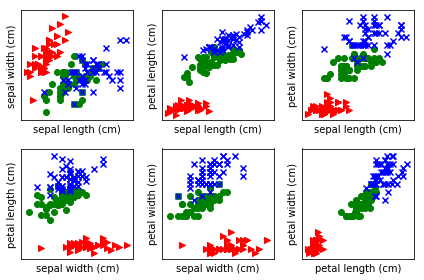

In [13]:
fig,axes = plt.subplots(2, 3)
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Set up 3 different pairs of (color, marker)
color_markers = [
        ('r', '>'),
        ('g', 'o'),
        ('b', 'x'),
        ]
for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for t in range(3):
        # Use a different color/marker for each class `t`
        c,marker = color_markers[t]
        ax.scatter(features[target == t, p0], features[
                    target == t, p1], marker=marker, c=c)
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

Learning a classification model (a decision tree):

In [14]:
from sklearn import tree

tr = tree.DecisionTreeClassifier(min_samples_leaf=10)

`fit` performs the learning (fits the model):

In [15]:
tr.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Plotting the decision tree (using an intermediate file):

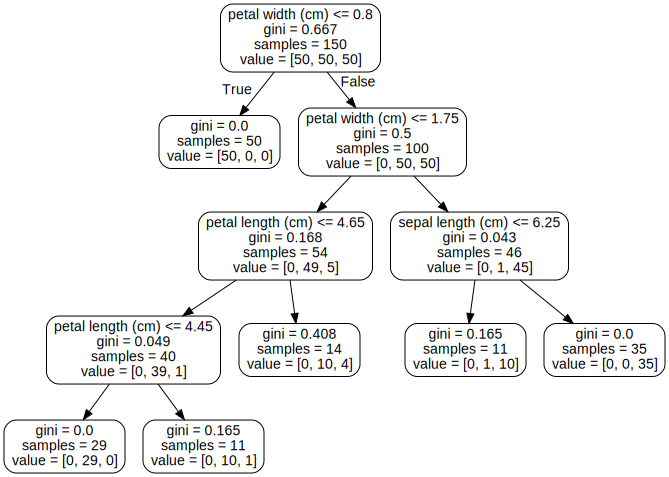

In [16]:
import graphviz
tree.export_graphviz(tr, feature_names=feature_names, rounded=True, out_file='decision.dot')

graphviz.Source(open('decision.dot').read())

Evaluating performance on the training set (which is **not the right way to do it**: see the discussion in the book)

In [17]:
prediction = tr.predict(features)
print("Accuracy: {:.1%}".format(np.mean(prediction == labels)))

Accuracy: 96.0%


In [19]:
np.mean(prediction == labels)

0.96

In [20]:
len(features)

150

Leave-one-out crossvalidation (a good way to do it):

In [21]:
predictions = []
for i in range(len(features)):
    train_features = np.delete(features, i, axis=0)
    train_labels = np.delete(labels, i, axis=0)
    tr.fit(train_features, train_labels)
    predictions.append(tr.predict([features[i]]))
predictions = np.array(predictions)

Compare the LOO predictions with the gold set:

In [22]:
print("Accuracy (with LOO CV): {:.1%}".format(np.mean(predictions.ravel() == labels)))

Accuracy (with LOO CV): 95.3%


In [25]:
predictions.ravel()

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

We can do the same leave-on-out cross validation with scikit-learn's `model_selection` module:

In [26]:
from sklearn import model_selection

predictions = model_selection.cross_val_predict(
    tr,
    features,
    labels,
    cv=model_selection.LeaveOneOut())
print(np.mean(predictions == labels))

0.9533333333333334


## The seeds dataset

A slightly more complex dataset

In [27]:
from load import load_dataset

feature_names = [
    'area',
    'perimeter',
    'compactness',
    'length of kernel',
    'width of kernel',
    'asymmetry coefficien',
    'length of kernel groove',
]
data = load_dataset('seeds')
features = data['features']
target = data['target']

In [36]:
target_names = data['target_names']
target.dtype

dtype('int32')

In [47]:
print(features)

[[15.26   14.84    0.871  ...  3.312   2.221   5.22  ]
 [14.88   14.57    0.8811 ...  3.333   1.018   4.956 ]
 [14.29   14.09    0.905  ...  3.337   2.699   4.825 ]
 ...
 [13.2    13.66    0.8883 ...  3.232   8.315   5.056 ]
 [11.84   13.21    0.8521 ...  2.836   3.598   5.044 ]
 [12.3    13.34    0.8684 ...  2.974   5.637   5.063 ]]


In [38]:
targets_ = np.array(target_names)[target]
targets_

array(['Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
      

We now try a _nearest neighbors_ classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Everything is similar to what we had before

In [43]:
kf = model_selection.KFold(n_splits=5, shuffle=False)
for training, testing in kf.split(features):
    print('training =', training)
    print('testing = ', testing)

training = [ 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209]
testing =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
training = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37 

In [44]:
kf = model_selection.KFold(n_splits=5, shuffle=False)
means = []
for training,testing in kf.split(features):
   # We learn a model for this fold with `fit` and then apply it to the
   # testing data with `predict`:
   knn.fit(features[training], target[training])
   prediction = knn.predict(features[testing])

   # np.mean on an array of booleans returns fraction
 # of correct decisions for this fold:
   curmean = np.mean(prediction == target[testing])
   means.append(curmean)
print('Mean accuracy: {:.1%}'.format(np.mean(means)))


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

classifier = KNeighborsClassifier(n_neighbors=5)
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

means = []
for training,testing in kf.split(features):
    # We learn a model for this fold with `fit` and then apply it to the
    # testing data with `predict`:
    classifier.fit(features[training], target[training])
    prediction = classifier.predict(features[testing])

    # np.mean on an array of booleans returns fraction
    # of correct decisions for this fold:
    curmean = np.mean(prediction == target[testing])
    means.append(curmean)
print('Mean accuracy: {:.1%}'.format(np.mean(means)))

Mean accuracy: 83.8%
Mean accuracy: 86.7%


In [45]:
features[:, [0,2]]

array([[15.26  ,  0.871 ],
       [14.88  ,  0.8811],
       [14.29  ,  0.905 ],
       [13.84  ,  0.8955],
       [16.14  ,  0.9034],
       [14.38  ,  0.8951],
       [14.69  ,  0.8799],
       [14.11  ,  0.8911],
       [16.63  ,  0.8747],
       [16.44  ,  0.888 ],
       [15.26  ,  0.8696],
       [14.03  ,  0.8796],
       [13.89  ,  0.888 ],
       [13.78  ,  0.8759],
       [13.74  ,  0.8744],
       [14.59  ,  0.8993],
       [13.99  ,  0.9183],
       [15.69  ,  0.9058],
       [14.7   ,  0.9153],
       [12.72  ,  0.8686],
       [14.16  ,  0.8584],
       [14.11  ,  0.8722],
       [15.88  ,  0.8988],
       [12.08  ,  0.8664],
       [15.01  ,  0.8657],
       [16.19  ,  0.8849],
       [13.02  ,  0.8641],
       [12.74  ,  0.8564],
       [14.11  ,  0.882 ],
       [13.45  ,  0.8604],
       [13.16  ,  0.8662],
       [15.49  ,  0.8724],
       [14.09  ,  0.8529],
       [13.94  ,  0.8728],
       [15.05  ,  0.8779],
       [16.12  ,  0.9   ],
       [16.2   ,  0.8734],
 

In [48]:
def plot_decision_space(clf, features, target, use_color=True):
    from matplotlib.colors import ListedColormap

    clf.fit(features[:, [0,2]], target)

    y0, y1 = features[:, 2].min() * .9, features[:, 2].max() * 1.1
    x0, x1 = features[:, 0].min() * .9, features[:, 0].max() * 1.1
    X = np.linspace(x0, x1, 1000)
    Y = np.linspace(y0, y1, 1000)
    X, Y = np.meshgrid(X, Y)
    C = clf.predict(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape)
    if use_color:
        cmap = ListedColormap([(1., .7, .7), (.7, 1., .7), (.7, .7, 1.)])
    else:
        cmap = ListedColormap([(1., 1., 1.), (.2, .2, .2), (.6, .6, .6)])

    fig,ax = plt.subplots()
    ax.scatter(features[:, 0], features[:, 2], c=target, cmap=cmap)
    for lab, ma in zip(range(3), "Do^"):
        ax.plot(features[target == lab, 0], features[
                 target == lab, 2], ma, c=(1., 1., 1.), ms=6)

    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[2])
    ax.pcolormesh(X, Y, C, cmap=cmap)
    return fig

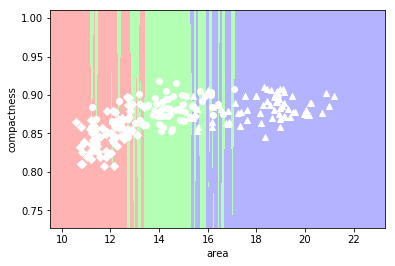

In [49]:
_ = plot_decision_space(knn, features, target)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

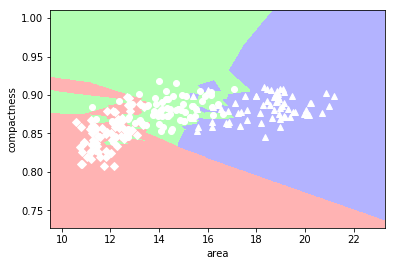

In [56]:
_ = plot_decision_space(classifier, features, target)

In [57]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = Pipeline([('norm', StandardScaler()), ('knn', classifier)])

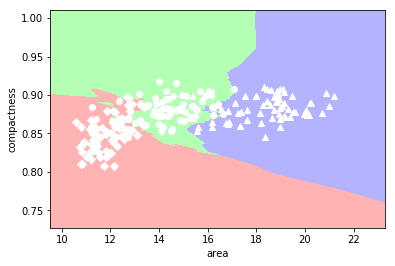

In [58]:
_ = plot_decision_space(classifier, features, target)

# Random forests

See the excellent paper [Do we Need Hundreds of Classifiers to Solve Real World Classification Problems?](http://jmlr.org/papers/v15/delgado14a.html) by Delgado et al. (2014) to understand why we recommend random forests as the default classifier.

In [59]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100)

Again, use cross-validation to evaluate:

In [60]:
predict = model_selection.cross_val_predict(rf, features, target)
print("RF accuracy: {:.1%}".format(np.mean(predict == target)))

RF accuracy: 87.6%


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Not in the book, but we can also plot the decision function for a random forest:

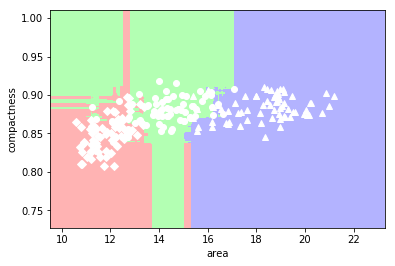

In [61]:
_= plot_decision_space(rf, features, target)